In [3]:
import numpy as np
import processi_EMGIT as em
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.stattools import acf, pacf,adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
%matplotlib inline

*Simulazione di geometic brownian motion con volatilità data dal valore assoluto di un un wiener process*

In [4]:
#23400 realized volatilities

s=em.gbm_mod(100,1,23400)
r2=em.calcolaRendimenti(s[0],len(s[0]))
f=em.realVol(r2,10,23400)
diff=np.zeros(len(f))
for i in range(len(f)):
    diff[i]=(s[1][i]-f[i])


In [5]:
#78realized volatilities
s=em.gbm_mod(100,1,23400)
r2=em.calcolaRendimenti(s[0],len(s[0]))
rv=em.realVol(r2,300,23400)
d=np.zeros(len(rv))
for (i,j) in zip(range(0,len(s[0]),300),range(len(rv))):
    d[j]=(rv[j]-s[1][i])

<Figure size 1440x720 with 0 Axes>

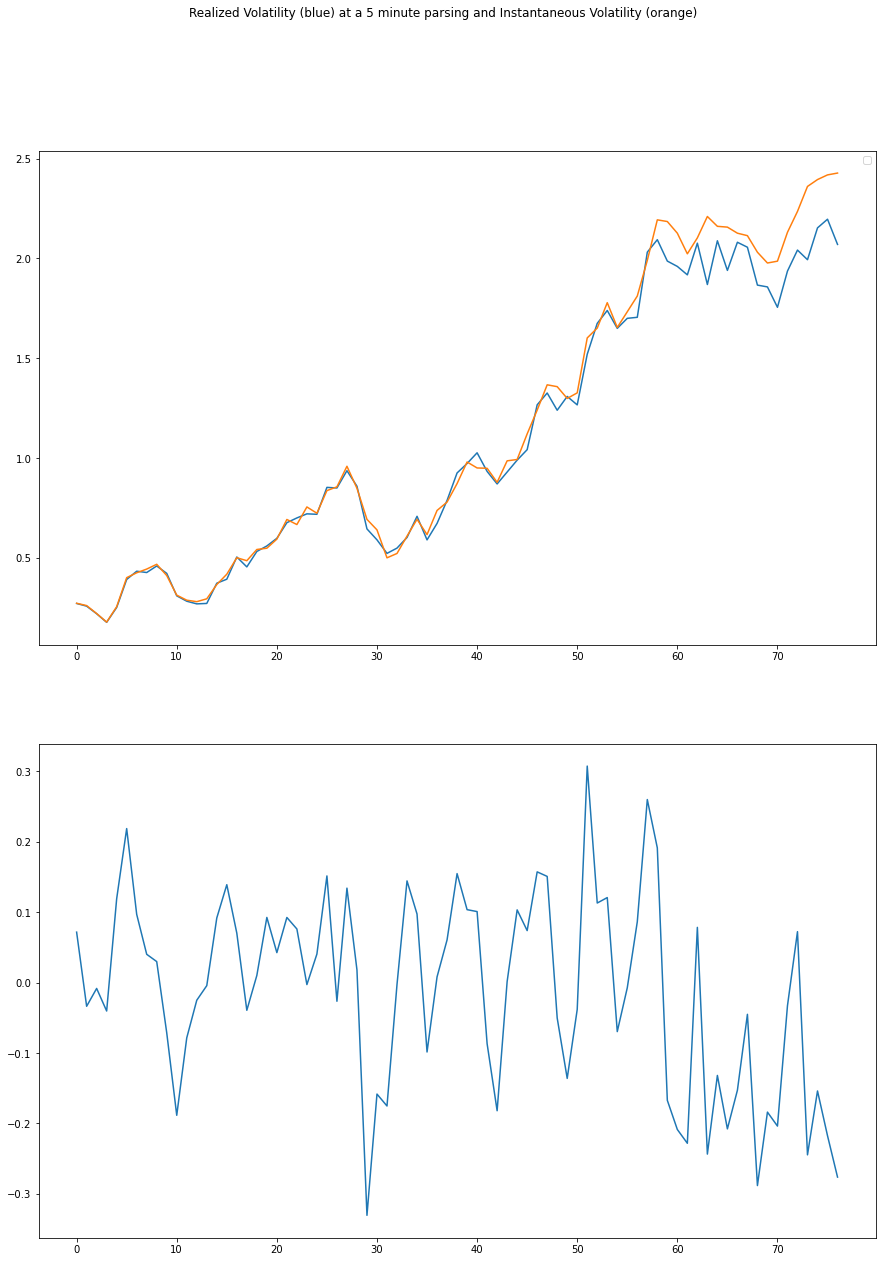

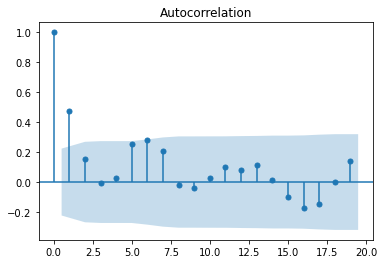

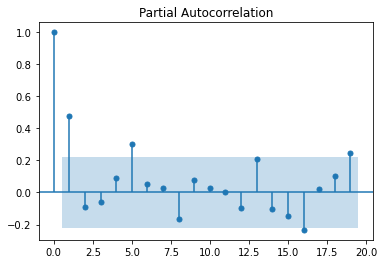

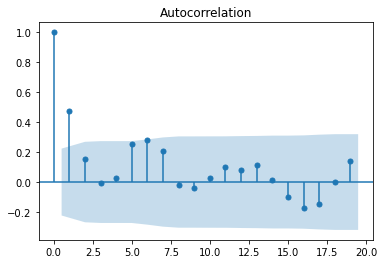

In [6]:
#78 realized volatilities
xx=[x for x in range(len(rv))]
z=s[1].reshape(-1,300).mean(axis=1)

plt.figure(figsize=(20, 10))
fig, axs = plt.subplots(2,figsize=(15,20))
fig.suptitle('Realized Volatility (blue) at a 5 minute parsing and Instantaneous Volatility (orange)')
#fig.inftitle("Differences: RV-sigma")
axs[0].legend("fff")
axs[0].plot(xx, rv,xx, z[1:])
axs[1].plot(d,label="differences")
plt.show()
plot_pacf(d)
plot_acf(d)

In [7]:
xx=[x for x in range(len(f))]
data=pd.DataFrame(f,index=xx)
#data[data[0]<1e-4].replace(data.mean(),inplace=True)
data.replace([data[0]<1e-4],data.mean(),inplace=True)

In [8]:
#z=f.mean()
#for i in range(len(f)):
#    if (f[i]<1e-5):
#        f[i]=z
#plt.plot(f)
#plt.show()

In [9]:
min(f)

0.08456157328371426

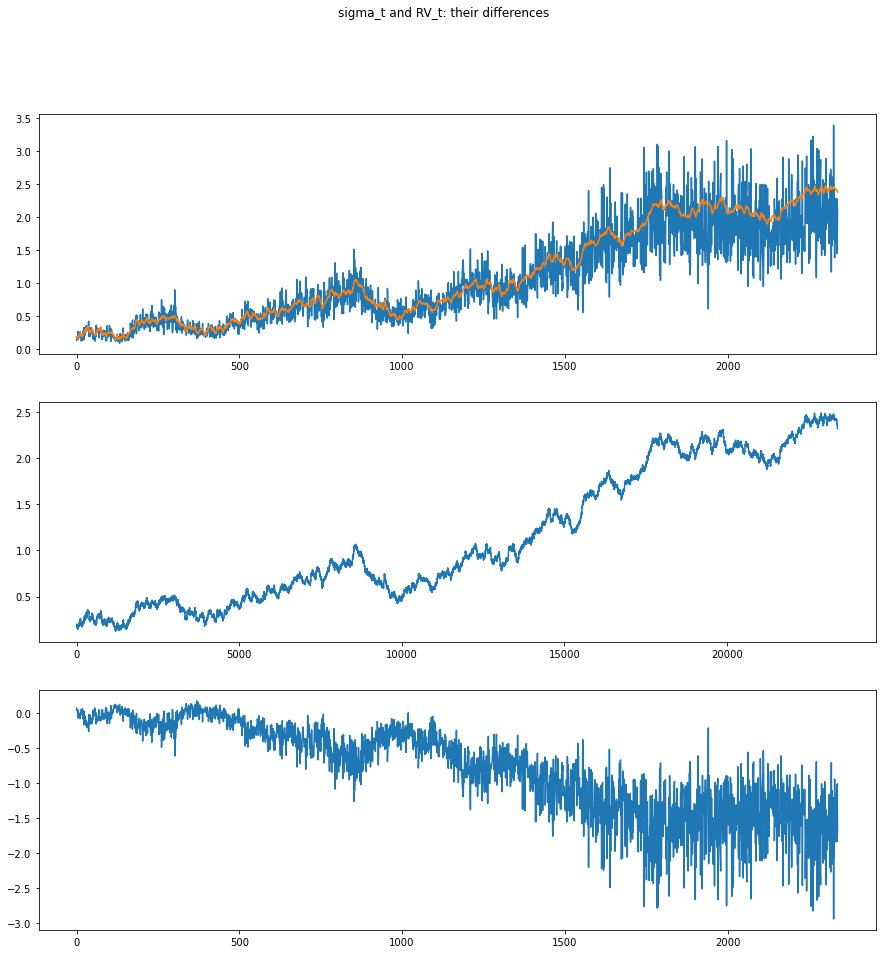

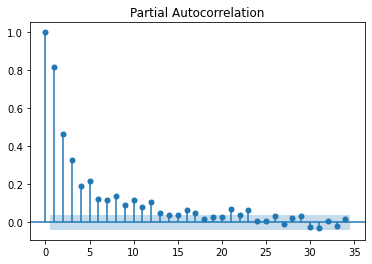

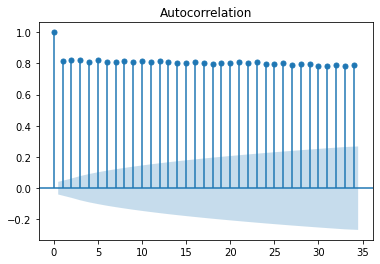

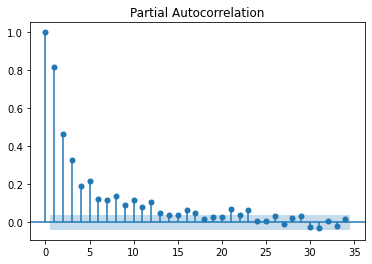

In [10]:
#23400 realized volatilities
xx=[x for x in range(len(f))]
z=s[1].reshape(-1,10).mean(axis=1)
fig, axs = plt.subplots(3,figsize=(15,15))
fig.suptitle('sigma_t and RV_t: their differences')
axs[0].plot(xx,f,xx,z[:-1])
axs[1].plot(s[1])
axs[2].plot(diff)

plt.show()
plot_acf(diff)
plot_pacf(diff)